Pre Processing

In [23]:
#importing libraries
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report

Loading Data

In [38]:
ex_data = pd.read_csv(r'./data.csv')
ex_data['Features'] = ex_data['Features'].apply(lambda x: list(map(float, x.split(','))))

In [39]:
ex_data.head()

,Features,Class
0,"[-351.6251220703125, 86.87262725830078, -14.98...",Cargo
1,"[-433.6374816894531, 102.78813934326172, 4.263...",Cargo
2,"[-459.4378967285156, 118.9866714477539, 14.566...",Cargo
3,"[-503.5106201171875, 129.89466857910156, 12.60...",Cargo
4,"[-290.6701965332031, 115.29109191894531, -9.09...",Cargo


In [40]:
X=np.array(ex_data['Features'].tolist())
y=np.array(ex_data['Class'].tolist())

In [51]:
X.shape

(609, 40)

In [50]:
y.shape

(609,)

In [41]:
X_test[1]

array([-6.74723750e+02,  1.65773930e+02, -1.19742035e+02, -6.69267350e+01,
       -2.83425770e+01, -3.88227900e+01, -3.84575840e+01, -1.11084600e+01,
       -1.74820440e+01, -4.25757360e+00, -1.15574310e+01,  3.67241550e+00,
        2.85031120e-02,  5.93416100e+00, -1.45032600e+00,  4.78073700e+00,
        8.25253500e-01,  5.73288970e+00,  1.32782610e+00,  2.13718220e+00,
       -4.79194670e-01,  1.82078680e+00,  1.55974760e+00,  3.21742820e+00,
        3.68151400e+00,  3.01460400e+00,  3.43556800e+00,  2.94419300e+00,
        4.87348650e+00,  3.39357350e+00,  4.04102100e+00,  2.01328830e+00,
        3.69617000e+00,  2.49704650e+00,  4.71409370e+00,  2.69723650e+00,
        3.61781330e+00,  1.78254750e+00,  3.35013460e+00,  2.42269060e+00])

In [8]:
y.shape

(552,)

In [42]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
# Count the occurrences of each category
category_count = Counter(y_train)

# Print the total count of each category
for category, count in category_count.items():
    print(f'{category}: {count}')

2: 189
0: 84
1: 158
3: 56


Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [48]:
## No of classes
num_labels=y.shape[0]
num_labels

609

In [49]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
num_epochs = 100
num_batch_size = 32

#checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),  verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
16/16 [==============================] - 2s 30ms/step - loss: 41.3107 - accuracy: 0.3018 - val_loss: 5.1976 - val_accuracy: 0.4180
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 26.9527 - accuracy: 0.2793 - val_loss: 2.5664 - val_accuracy: 0.4262
Epoch 3/100
16/16 [==============================] - 0s 11ms/step - loss: 17.5842 - accuracy: 0.2936 - val_loss: 1.4264 - val_accuracy: 0.4344
Epoch 4/100
16/16 [==============================] - 0s 11ms/step - loss: 13.5457 - accuracy: 0.2731 - val_loss: 1.3965 - val_accuracy: 0.4918
Epoch 5/100
16/16 [==============================] - 0s 18ms/step - loss: 9.7351 - accuracy: 0.3018 - val_loss: 1.3897 - val_accuracy: 0.3852
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 7.7900 - accuracy: 0.3162 - val_loss: 1.3249 - val_accuracy: 0.3197
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 6.4746 - accuracy: 0.2977 - val_loss: 1.3889 - val_accuracy: 0.2787
Epo

In [55]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.5409836173057556


In [56]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [57]:
y_pred_classes = np.argmax(y_pred, axis=1)

# Decode labels
y_test_decoded = labelencoder.inverse_transform(y_test)
y_pred_decoded = labelencoder.inverse_transform(y_pred_classes)

# Print classification report
print(classification_report(y_test_decoded, y_pred_decoded))

              precision    recall  f1-score   support

       Cargo       0.00      0.00      0.00        25
   Passenger       0.48      0.85      0.62        33
      Tanker       0.59      0.75      0.66        51
         Tug       0.00      0.00      0.00        13

    accuracy                           0.54       122
   macro avg       0.27      0.40      0.32       122
weighted avg       0.38      0.54      0.44       122



c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(70.72222222222221, 0.5, 'Truth')

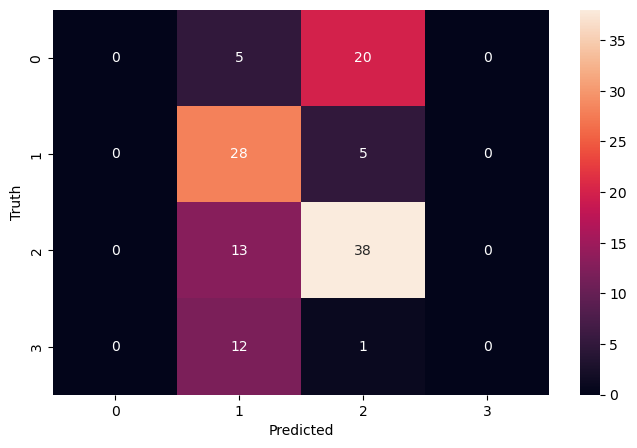

In [58]:
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')